# Mr.Vinayak Vijay Kulkarni


# Exploratory Data Analysing Using Youtube Video Data from Most Popular Data Science Channels

# 1. Aims, objectives and background

## 1.1. Introduction

Founded in 2005, Youtube has grown to become the second largest search engine in the world (behind Google) that processes more than 3 billion searches per month. [[1]](https://www.mushroomnetworks.com/infographics/youtube---the-2nd-largest-search-engine-infographic/). It is, however, generally a myth how the Youtube algorithm works, what makes a video get views and be recommended over another. In fact, YouTube has one of the largest scale and most sophisticated industrial recommendation systems in existence [[2]](https://dl.acm.org/doi/10.1145/2959100.2959190). For new content creators, it is a challenge to understand why a video gets video and others do not. There are many "myths" around the success of a Youtube video [[3]](https://vidiq.com/blog/post/5-youtube-algorithm-myths-youtubers-need-to-know-about/), for example if the video has more likes or comments, or if the video is of a certain duration. It is also worth experimenting and looking for "trends" in the topics that Youtube channels are covering in a certain niche.

Having recently stepping into the content creation world with a new Youtube channel on data analytics and data science, I decided to gain some insights on this topic which might be useful for other new content creators. The scope of this small project is limited to data science channels and I will not consider other niches (that might have a different characteristics and audience base). Therefore, in this project will explore the statistics of around 10 most successful data science Youtube channel.

## 1.2. Aims and objectives

Within this project, I would like to explore the following:

- Getting to know Youtube API and how to obtain video data.
- Analyzing video data and verify different common "myths" about what makes a video do well on Youtube, for example:
    - Does the number of likes and comments matter for a video to get more views?
    - Does the video duration matter for views and interaction (likes/ comments)?
    - Does title length matter for views?
    - How many tags do good performing videos have? What are the common tags among these videos?
    - Across all the creators I take into consideration, how often do they upload new videos? On which days in the week?


## 1.3. Steps of the project
1. Obtain video meta data via Youtube API for the top 10-15 channels in the data science niche (this includes several small steps: create a developer key, request data and transform the responses into a usable data format)
2. Prepocess data and engineer additional features for analysis
3. Exploratory data analysis
4. Conclusions

## 1.4. Dataset

### Data limitations

The dataset is a real-world dataset and suitable for the research. However, the selection of the 5 Youtube channels to include in the research is purely based on my knowledge of the channels in data science field and might not be accurate. My definition is "popular" is only based on subscriber count but there are other metrics that could be taken into consideration as well (e.g. views, engagement).There might be smaller channels that might also very interesting to look into, which could be the next step of this project.

### Ethics of data source

According to [Youtube API's guide](https://developers.google.com/youtube/v3/getting-started), the usage of Youtube API is free of charge given that your application send requests within a quota limit. "The YouTube Data API uses a quota to ensure that developers use the service as intended and do not create applications that unfairly reduce service quality or limit access for others. " The default quota allocation for each application is 10,000 units per day, and you could request additional quota by completing a form to YouTube API Services if you reach the quota limit.

Since all data requested from Youtube API is public data (which everyone on the Internet can see on Youtube), there is no particular privacy issues as far as I am concerned. In addition, the data is obtained only for research purposes in this case and not for any commercial interests.

In [ ]:
#Creating API Queue
# Documentation for how to access the data
#Youtube Data API 3


In [1]:
!pip install google-api-python-client 

In [41]:
# Google API
from googleapiclient.discovery import build
# Data manipulation & visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil import parser
import isodate

# 2. Data creation with Youtube API

I first created a project on Google Developers Console, then requested an authorization credential (API key). Afterwards, I enabled Youtube API for my application, so that I can send API requests to Youtube API services. Then, I went on Youtube and checked the channel ID of each of the channels that I would like to include in my research scope (using their URLs). Then I created the functions for getting the channel statistics via the API.

In [2]:
api_key=''
channel_ids=['UCNU_lfiiWBdtULKOw6X0Dig',#Krish Naik
            'UCLLw7jmFsvfIVaUFsLs8mlQ',#Luke Barousse
            'UCiT9RITQ9PW6BhXK0y2jaeg',#Ken Jee
            'UC7cs8q-gJRlGwj4A8OmCmXg',#Alex the analyst
            'UCh9nVJoWXmFb7sLApWGcLPQ' # Code Basics
           ]
#Create a Youtube service
youtube=build('youtube','v3',developerKey=api_key)

## Get Channel Statistics

Using the `get_channel_stats` function defined below, now we are going to obtain the channel statistics for the 5 channels in scope.

In [3]:
def get_channel_stats(youtube,channel_id):
    all_data=[]
    request=youtube.channels().list(
    part='snippet,contentDetails,statistics',
    id=','.join(channel_ids))
    response=request.execute()
    for i in range(len(response['items'])):
        data=dict(Channel_name=response['items'][i]['snippet']['title'],
             Subscribers=response['items'][i]['statistics']['subscriberCount'],
              Views=response['items'][i]['statistics']['viewCount'],
              Total_videos=response['items'][i]['statistics']['videoCount'],
              Playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
                 
    
    return all_data

In [4]:
channel_statistics=get_channel_stats(youtube,channel_ids)

In [5]:
channel_data=pd.DataFrame(channel_statistics)

Now I can print out the data and take a look at the channel statistics overview.

In [6]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,Playlist_id
0,codebasics,590000,37967883,509,UUh9nVJoWXmFb7sLApWGcLPQ
1,Ken Jee,203000,6351938,232,UUiT9RITQ9PW6BhXK0y2jaeg
2,Luke Barousse,174000,8548805,76,UULLw7jmFsvfIVaUFsLs8mlQ
3,Alex The Analyst,225000,8871014,145,UU7cs8q-gJRlGwj4A8OmCmXg
4,Krish Naik,581000,54244445,1402,UUNU_lfiiWBdtULKOw6X0Dig


To check the data types of channel data

In [7]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
Playlist_id     object
dtype: object

To convert the subscribers, views, Total_videos to numeric type

In [8]:
channel_data['Subscribers']=pd.to_numeric(channel_data['Subscribers'])
channel_data['Views']=pd.to_numeric(channel_data['Views'])
channel_data['Total_videos']=pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
Playlist_id     object
dtype: object

Let's take a look at the number of subscribers per channel to have a view of how popular the channels are when compared with one another.

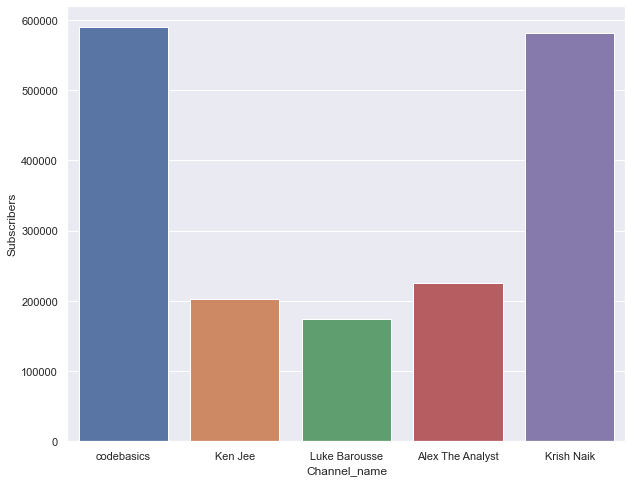

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(x='Channel_name',y='Subscribers',data=channel_data)

Krish Naik and Codebasics remain the two most popular channels considering both subscribers and views. 
Interestingly, some channels have more subscribers but less views and vice versa. 
For example, Ken Jee channel has significantly more subscribers than Luke Barousse channel, but slightly less views in total.

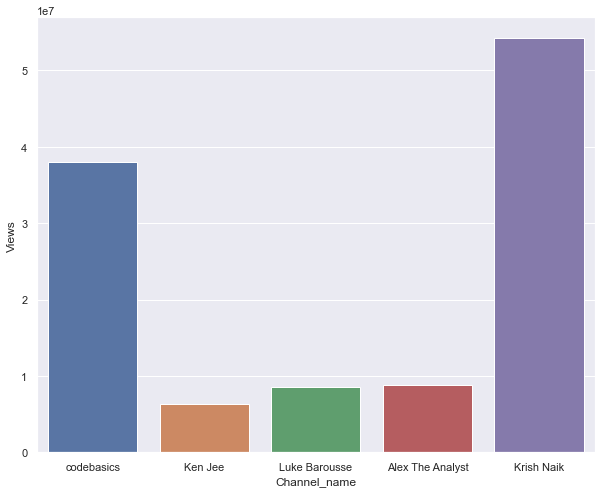

In [10]:
ax=sns.barplot(x='Channel_name',y='Views',data=channel_data)

To study the total number of videos uploaded by each channel and from the graph observations Krish naik channel has uploaded the highest number of videos

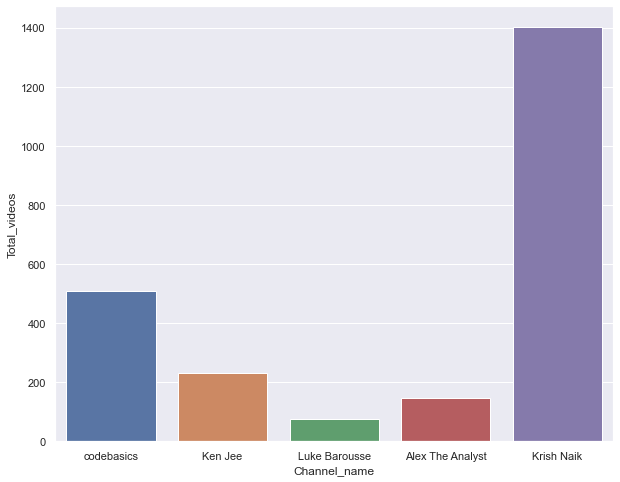

In [11]:
ax=sns.barplot(x='Channel_name',y='Total_videos',data=channel_data)

# Scrape Video Details

## Function to get Video ids

In [12]:
def get_video_ids(youtube,Playlist_id):
    
    request=youtube.playlistItems().list(
              part='contentDetails',
               playlistId=Playlist_id,
               maxResults=50)
    response=request.execute()
    
    video_ids=[]
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token=response.get('nextPageToken')
    more_pages=True
    
    while more_pages:
        if next_page_token is None:
            more_pages=False
        else:
            request=youtube.playlistItems().list(
              part='contentDetails',
               playlistId=Playlist_id,
               maxResults=50,
               pageToken=next_page_token)
            response=request.execute()
            
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token=response.get('nextPageToken')
    
    return video_ids

# Function to get video Details

In [13]:
def get_video_details(youtube, video_ids):
    """
    Get video statistics of all videos with given IDs
    Params:
    
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs
    
    Returns:
    Dataframe with statistics of videos, i.e.:
        'channelTitle', 'title', 'description', 'tags', 'publishedAt'
        'viewCount', 'likeCount', 'favoriteCount', 'commentCount'
        'duration', 'definition', 'caption'
    """
        
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 

        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
            
    return all_video_info

In [14]:
# Create a dataframe with video statistics and comments from all channels

video_df = pd.DataFrame()


for c in channel_data['Channel_name'].unique():
    print("Getting video information from channel: " + c)
    playlist_id = channel_data.loc[channel_data['Channel_name']== c, 'Playlist_id'].iloc[0]
    video_ids = get_video_ids(youtube, playlist_id)
    
    # get video data
    video_data = get_video_details(youtube, video_ids)
    

    # append video data together and comment data toghether
    video_df = video_df.append(video_data, ignore_index=True)

    

Getting video information from channel: codebasics
Getting video information from channel: Ken Jee
Getting video information from channel: Luke Barousse
Getting video information from channel: Alex The Analyst
Getting video information from channel: Krish Naik


Now I can print out the data and take a look at the channel video details overview.

In [15]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,P3RoteuI87Q,codebasics,Scholarship For Codebasics Data Analytics Course,There is a scholarship available for students ...,"[yt:cc=on, power bi course, power bi tutorials...",2022-05-28T14:00:11Z,9311,404,None,110,PT7M28S,hd,false
1,cElCnuA40os,codebasics,Power BI Tutorials For Beginners: The Course i...,My video course - Get Job Ready: Power BI Data...,"[yt:cc=on, power bi tutorials, power bi for be...",2022-05-26T13:30:10Z,9994,378,None,116,PT12M50S,hd,false
2,GUZwFRs9f5c,codebasics,Must have skill for exploratory data analysis.,Very easy to understand Pandas tutorials: http...,"[pandas, python pandas, python pandas library,...",2022-05-21T15:00:14Z,11524,467,None,23,PT50S,hd,false
3,poHVmxGpvW8,codebasics,Data science skills 10 years from now!,How can you find the best career for yourself?...,"[data science full course, data scientist, mac...",2022-05-16T15:20:18Z,17423,821,None,36,PT53S,hd,false
4,gdHWoQWZGkk,codebasics,Part Of Speech POS Tagging: NLP Tutorial For B...,Part of speech or POS tagging is used to tag p...,"[yt:cc=on, pos tagging, parts of speech taggin...",2022-05-14T15:00:12Z,4445,131,None,18,PT25M49S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,MTiaCUh1420,Krish Naik,Important libraries used in python Data Scienc...,Important libraries used in python Data Scienc...,"[Machine Learning, Artificial Intelligence, Da...",2017-11-26T07:48:27Z,17413,150,None,15,PT8M31S,sd,false
2361,DeT8mji0Jos,Krish Naik,Anaconda installation with Packages- Machine L...,Detailed explanation of anaconda python instal...,"[Machine Learning, Artificial Intelligence, Da...",2017-11-26T06:16:34Z,71030,319,None,37,PT5M18S,sd,false
2362,HrHJUc26YxI,Krish Naik,What is Supervised Machine Learning- Machine L...,Detailed Explanation of Supervised Machine Lea...,"[Machine Learning basics, Artificial Intellige...",2017-11-26T04:50:08Z,29147,337,None,17,PT11M42S,sd,false
2363,EqRsD3gqeCo,Krish Naik,What is Machine Learning in Data Science- Mach...,"Detailed explanation of Machine Learning ,type...","[Machine learning basics and types, Data Scien...",2017-11-25T12:27:20Z,112372,683,None,43,PT10M1S,hd,false


In [16]:
# Write video data to CSV file for future references
video_df.to_csv('video_data_top5_channels.csv')

## Preprocessing & Feature engineering

To be able to make use of the data for analysis, we need to perform a few pre-processing steps. Firstly, I would like reformat some columns, especially the date and time columns such as "pushlishedAt". In addition, I also think it is necessary to enrich the data with some new features that might be useful for understanding the videos' characteristics.

### Check for empty values

In [17]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [18]:
video_df['publishedAt'].sort_values().value_counts()

2019-05-08T04:51:05Z    17
2019-05-08T04:51:06Z     9
2019-01-19T13:35:07Z     4
2019-01-19T13:35:06Z     2
2020-12-07T14:00:11Z     2
                        ..
2020-05-07T13:46:14Z     1
2020-05-08T06:34:45Z     1
2020-05-08T13:00:03Z     1
2020-05-08T17:30:49Z     1
2022-05-30T12:19:39Z     1
Name: publishedAt, Length: 2336, dtype: int64

Next, we need to check if the data type of the columns are correct. I have checked the data types and indeed some count columns such as view count and comment count are currently not in correct data type. In this step, we convert these count columns into integer.

In [20]:
cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[cols] = video_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [21]:
video_df.dtypes

video_id           object
channelTitle       object
title              object
description        object
tags               object
publishedAt        object
viewCount         float64
likeCount         float64
favouriteCount    float64
commentCount      float64
duration           object
definition         object
caption            object
dtype: object

# Enriching data

I want to enrich the data for further analyses, for example:

* create published date column with another column showing the day in the week the video was published, which will be useful for later analysis.

* convert video duration to seconds instead of the current default string format

* calculate number of tags for each video

* calculate comments and likes per 1000 view ratio

* calculate title character length

In [34]:
# Create publish day (in the week) column
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['pushblishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A")) 

In [35]:
# convert duration to seconds
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [36]:
# Add number of tags
video_df['tagsCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [37]:
# Comments and likes per 1000 view ratio
video_df['likeRatio'] = video_df['likeCount']/ video_df['viewCount'] * 1000
video_df['commentRatio'] = video_df['commentCount']/ video_df['viewCount'] * 1000

In [38]:
# Title character length
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

Let's look at the video dataset at this point to see if everything went well. It looks good - now we will proceed to exploratory analysis part.To extract the Top 10 Videos from the videos list

In [39]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,P3RoteuI87Q,codebasics,Scholarship For Codebasics Data Analytics Course,There is a scholarship available for students ...,"[yt:cc=on, power bi course, power bi tutorials...",2022-05-28 14:00:11+00:00,9311.0,404.0,NaN,110.0,PT7M28S,hd,false,Saturday,448.0,18,43.389539,11.813983,48
1,cElCnuA40os,codebasics,Power BI Tutorials For Beginners: The Course i...,My video course - Get Job Ready: Power BI Data...,"[yt:cc=on, power bi tutorials, power bi for be...",2022-05-26 13:30:10+00:00,9994.0,378.0,NaN,116.0,PT12M50S,hd,false,Thursday,770.0,6,37.822694,11.606964,58
2,GUZwFRs9f5c,codebasics,Must have skill for exploratory data analysis.,Very easy to understand Pandas tutorials: http...,"[pandas, python pandas, python pandas library,...",2022-05-21 15:00:14+00:00,11524.0,467.0,NaN,23.0,PT50S,hd,false,Saturday,50.0,13,40.524124,1.995835,46
3,poHVmxGpvW8,codebasics,Data science skills 10 years from now!,How can you find the best career for yourself?...,"[data science full course, data scientist, mac...",2022-05-16 15:20:18+00:00,17423.0,821.0,NaN,36.0,PT53S,hd,false,Monday,53.0,11,47.121621,2.066234,38
4,gdHWoQWZGkk,codebasics,Part Of Speech POS Tagging: NLP Tutorial For B...,Part of speech or POS tagging is used to tag p...,"[yt:cc=on, pos tagging, parts of speech taggin...",2022-05-14 15:00:12+00:00,4445.0,131.0,NaN,18.0,PT25M49S,hd,false,Saturday,1549.0,25,29.471316,4.049494,59


# Exploratory analysis

Views distribution per channel

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


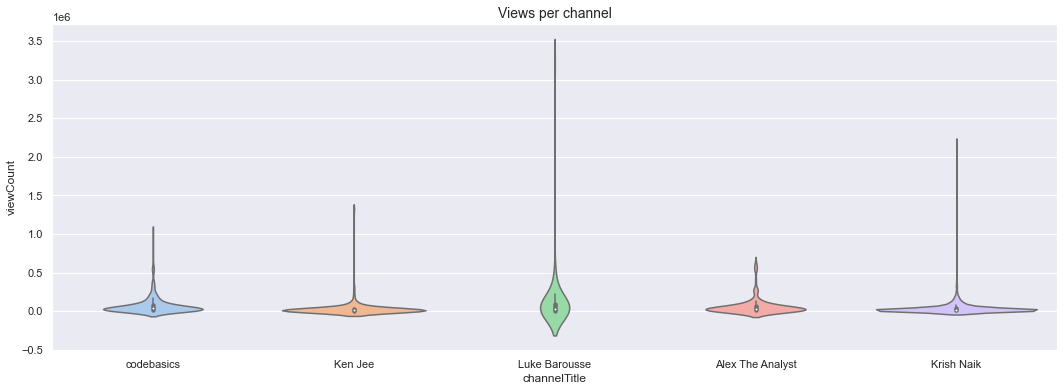

In [42]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.violinplot(video_df['channelTitle'], video_df['viewCount'], palette = 'pastel')
plt.title('Views per channel', fontsize = 14)
plt.show()

## Does the number of likes and comments matter for a video to get more views?

Firstly, I would like to check if comments and likes do correlate with how many views a video would get. In the plots below, it can be observed that the number of views and number of comments/ likes strongly correlated with each other. The number of likes seems to suggest stronger correlation than the number of comments. However, this is expected as the more people watching a video, the more likely this video will get comments and likes.

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

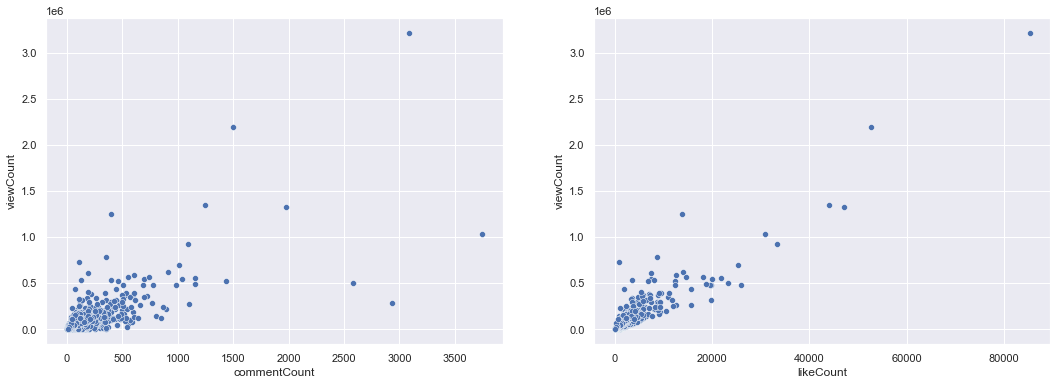

In [43]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "likeCount", y = "viewCount", ax=ax[1])

## Does the video duration matter for views and interaction (likes/ comments)?

As can be seen in the histogram below, most videos are between 300 to 1200 seconds, which is about 5 to 20 minutes. Here I have to limit the duration to 10,000 because of some really long videos (potentially streaming videos).

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

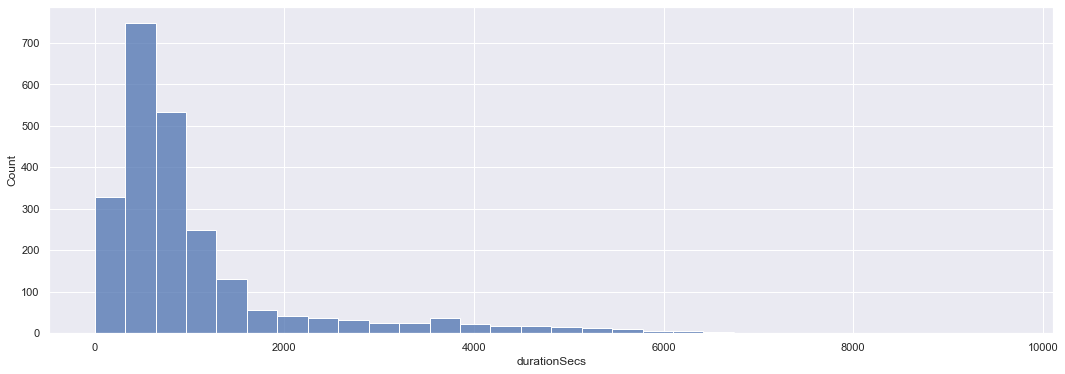

In [44]:
sns.histplot(data=video_df[video_df['durationSecs'] < 10000], x="durationSecs", bins=30)

Now we plot the duration against comment count and like count. It can be seen that actually shorter videos tend to get more likes and comments than very long videos.

<AxesSubplot:xlabel='durationSecs', ylabel='likeCount'>

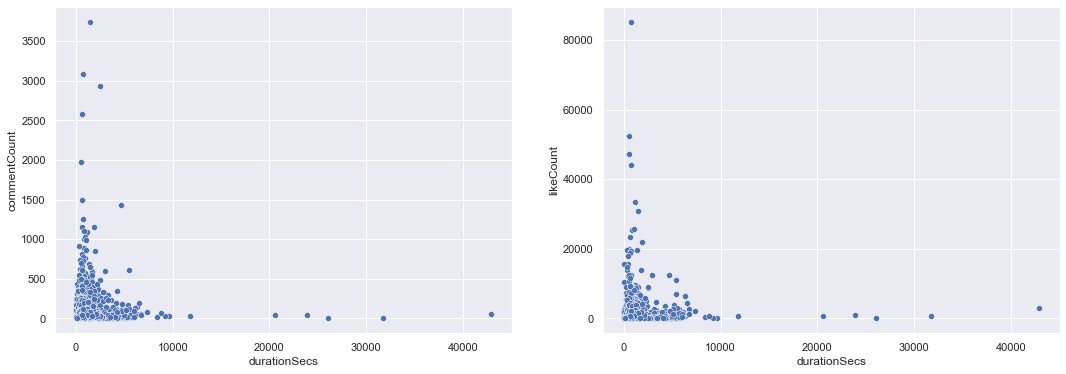

In [45]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "durationSecs", y = "commentCount", ax=ax[0])
sns.scatterplot(data = video_df, x = "durationSecs", y = "likeCount", ax=ax[1])

### Does title length matter for views?

There is no clear relationship between title length and views as seen the scatterplot below.

<AxesSubplot:xlabel='titleLength', ylabel='viewCount'>

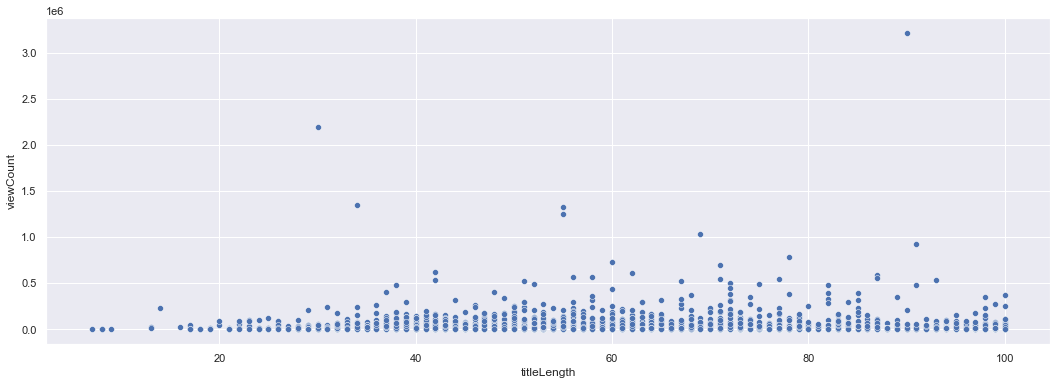

In [46]:
sns.scatterplot(data = video_df, x = "titleLength", y = "viewCount")

### Number of tags vs views

It seems that most videos have between 5 and 30 tags. The relationship between number of tags and view count is not clearly seen, but too few tags or too many tags do seem to correlate with fewer views.

<AxesSubplot:xlabel='tagsCount', ylabel='viewCount'>

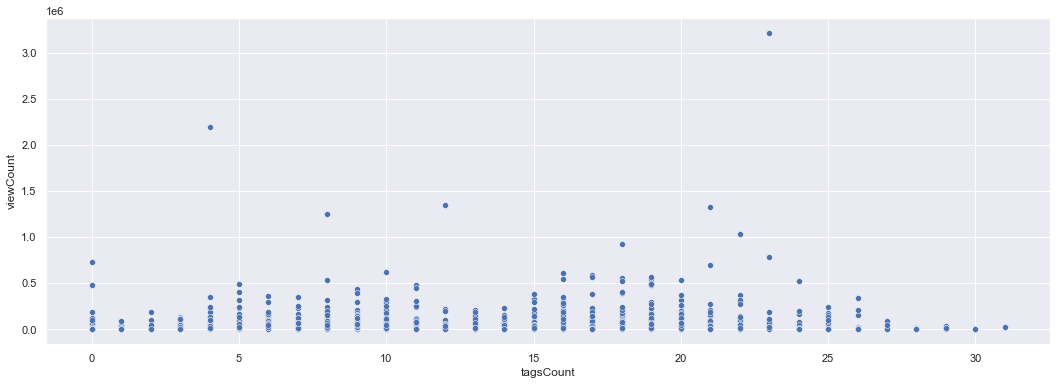

In [47]:
sns.scatterplot(data = video_df, x = "tagsCount", y = "viewCount")

# Conclusions and future research ideas

In this project, we have explored the video data of the 5 most popular Data science/ Data analyst channels and revealed many interesting findings for anyone who are starting out with a Youtube channel in data science or another topic:

* The more likes and comments a video has, the more views the video gets (it is not guaranteed that this is a causal relationship, it is simply a correlation and can work both way). Likes seem to be a better indicator for interaction than comments and the number of likes seem to follow the "social proof", which means the more views the video has, the more people will like it.

* Most videos have between 5 and 30 tags.

* Most-viewed videos tend to have average title length of 30-70 characters. Too short or too long titles seem to harm viewership.


# References/ Resources used:

[1] Youtube API. Avaiable at https://developers.google.com/youtube/v3

[2] A Reference for working on Youtube API for data analysis
https://www.youtube.com/watch?v=D56_Cx36oGY&list=PLbHrOSG7nVN1z4XoLX7_RC-WkgZHc3tnV&index=3

[3] A Reference to scrape Youtube using Youtube API for data analysis
https://www.youtube.com/watch?v=SwSbnmqk3zY&list=PLavw5C92dz9HwT_uStsDdJbuBOt_XD0ch&index=1

